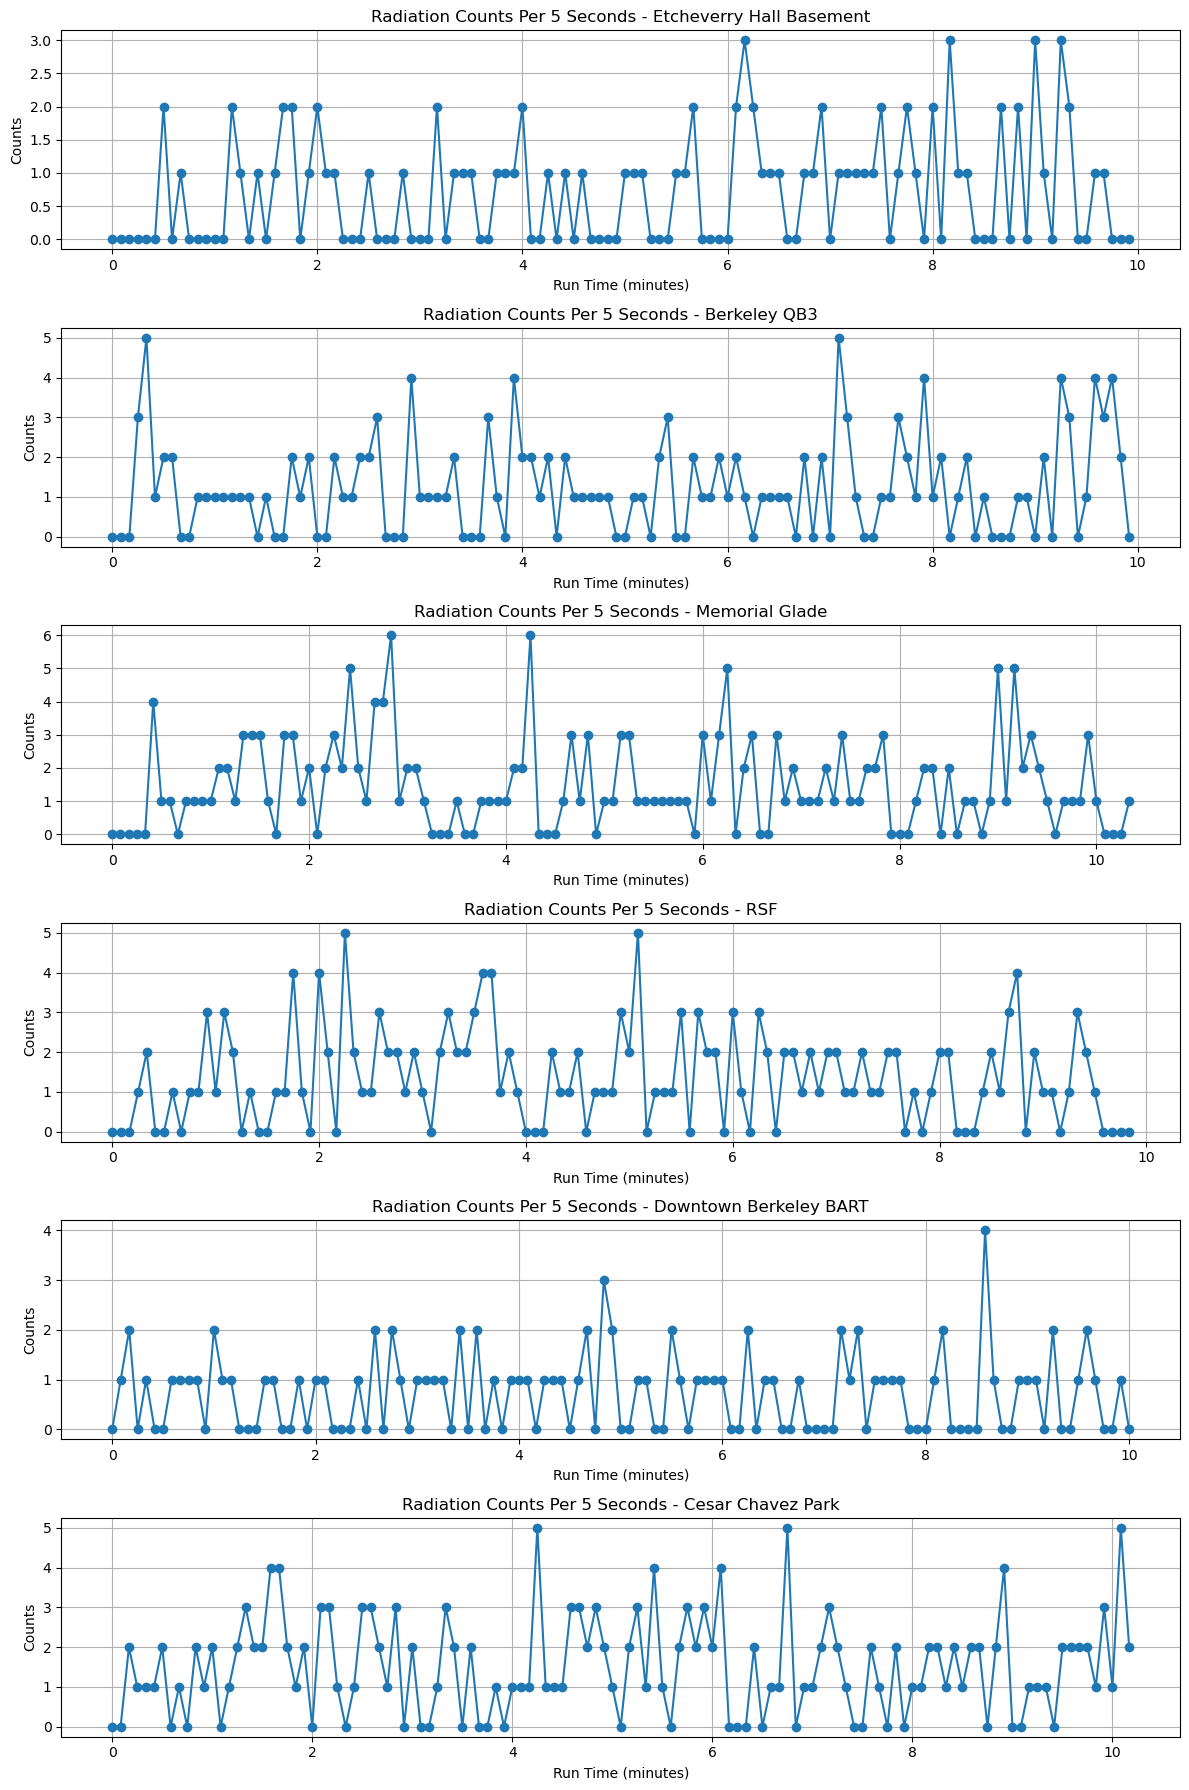

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    "Spectrum_Loc1_session1_group1_2025-04-29_12-41-19.csv",
    "Spectrum_Loc2_session1_group1_2025-04-29_13-14-20.csv",
    "Spectrum_Loc3_session1_group1_2025-04-29_13-32-08.csv",
    "Spectrum_Loc4_session1_group1_2025-04-29_14-11-54.csv",
    "Spectrum_Loc5_session1_group1_2025-04-29_14-45-59.csv",
    "Spectrum_Loc6_session1_group1_2025-04-29_15-20-14.csv"
]

labels = [
    "Etcheverry Hall Basement",
    "Berkeley QB3",
    "Memorial Glade",
    "RSF",
    "Downtown Berkeley BART",
    "Cesar Chavez Park"
]

fig, axes = plt.subplots(len(files), 1, figsize=(12, 18), sharex=False)

for i, (file, label) in enumerate(zip(files, labels)):
    df = pd.read_csv(file)
    
    df["Total_Counts"] = df["1023"]  
    
    df["Minutes"] = [i * 5 / 60 for i in range(len(df))]
    
    df["Counts_Difference"] = df["Total_Counts"].diff().fillna(0)
    
    axes[i].plot(df["Minutes"], df["Counts_Difference"], marker='o', linestyle='-')
    axes[i].set_title(f"Radiation Counts Per 5 Seconds - {label}")
    axes[i].set_xlabel("Run Time (minutes)")
    axes[i].set_ylabel("Counts")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


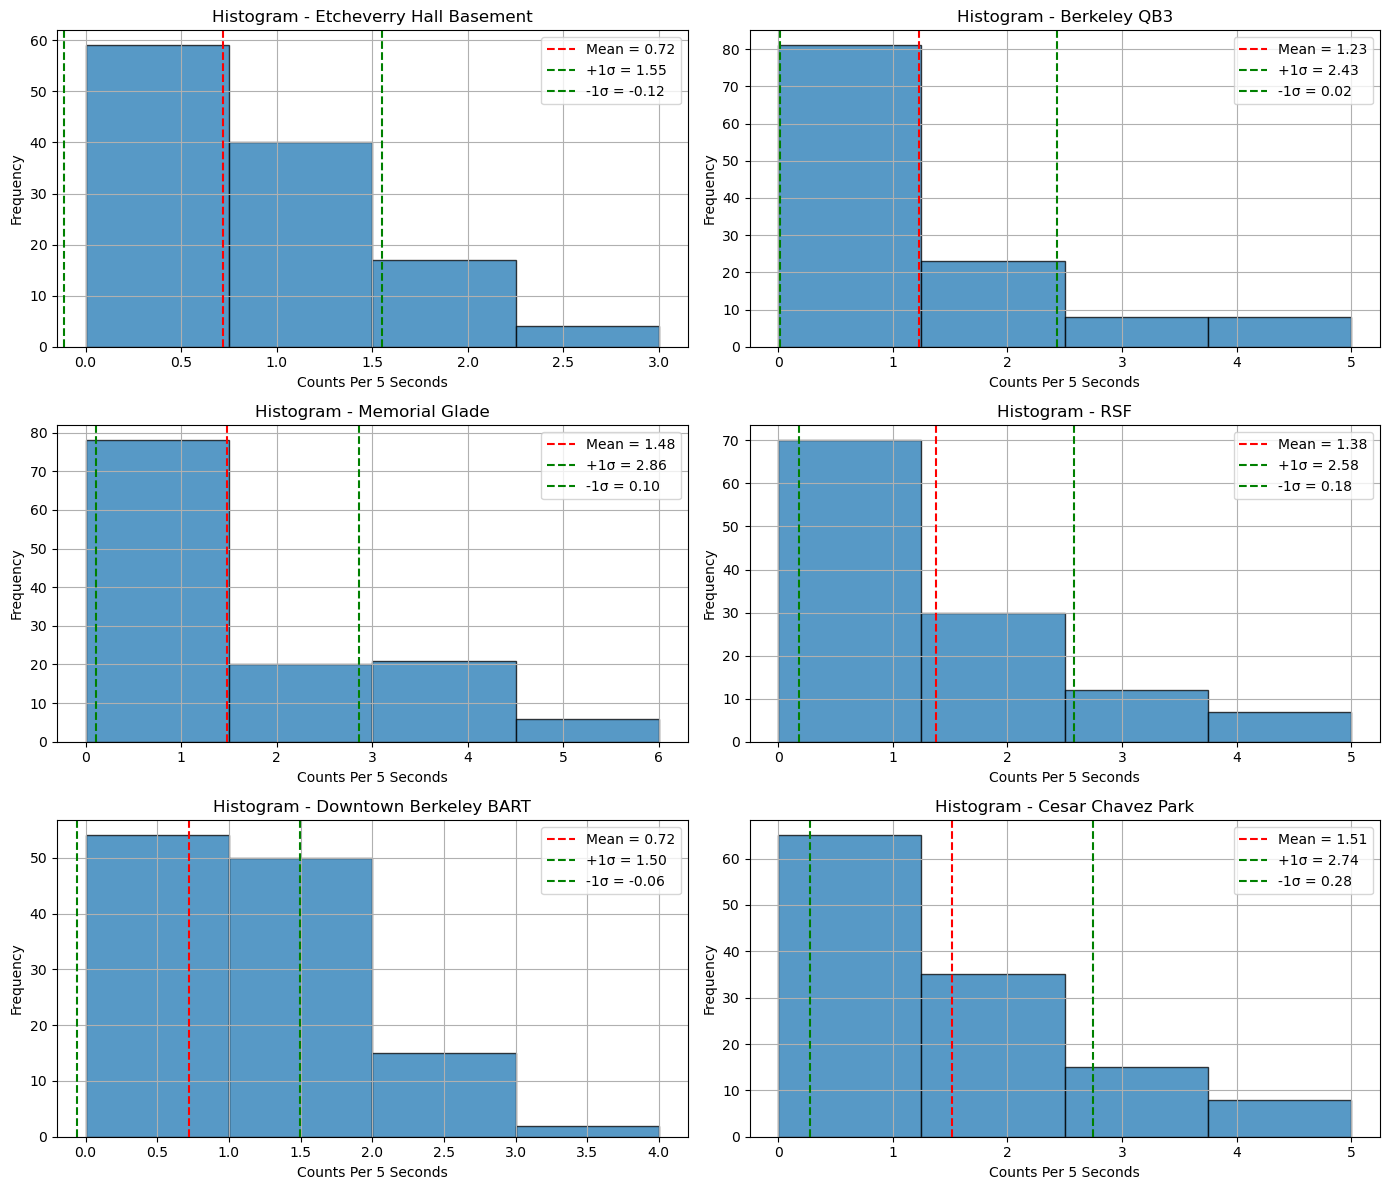

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    "Spectrum_Loc1_session1_group1_2025-04-29_12-41-19.csv",
    "Spectrum_Loc2_session1_group1_2025-04-29_13-14-20.csv",
    "Spectrum_Loc3_session1_group1_2025-04-29_13-32-08.csv",
    "Spectrum_Loc4_session1_group1_2025-04-29_14-11-54.csv",
    "Spectrum_Loc5_session1_group1_2025-04-29_14-45-59.csv",
    "Spectrum_Loc6_session1_group1_2025-04-29_15-20-14.csv"
]

labels = [
        "Etcheverry Hall Basement",
        "Berkeley QB3",
        "Memorial Glade",
        "RSF",
        "Downtown Berkeley BART",
        "Cesar Chavez Park"
    ]

locations = {}
for file, label in zip(files, labels):
    df = pd.read_csv(file)
    df["Total_Counts"] = df["1023"]  
    df["Counts_Difference"] = df["Total_Counts"].diff().fillna(0)
    locations[label] = df

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for ax, (label, df) in zip(axes, locations.items()):
    counts = df["Counts_Difference"]
    mean = counts.mean()
    std = counts.std()

    ax.hist(counts, bins=4, edgecolor="black", alpha=0.75)
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
    ax.axvline(mean + std, color='green', linestyle='--', label=f'+1σ = {mean + std:.2f}')
    ax.axvline(mean - std, color='green', linestyle='--', label=f'-1σ = {mean - std:.2f}')
    
    ax.set_title(f"Histogram - {label}")
    ax.set_xlabel("Counts Per 5 Seconds")
    ax.set_ylabel("Frequency")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

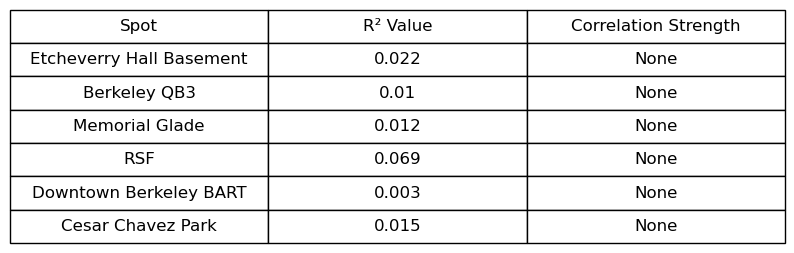

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Spot": [
        "Etcheverry Hall Basement",
        "Berkeley QB3",
        "Memorial Glade",
        "RSF",
        "Downtown Berkeley BART",
        "Cesar Chavez Park"
    ],
    "R² Value": [0.022, 0.010, 0.012, 0.069, 0.003, 0.015],
    "Correlation Strength": ["None", "None", "None", "None", "None", "None"]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
plt.show()
